In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('predictions.csv')
df

,date,ticker_x,open,high,low,open_index,close_index,open_currency,close_currency,NEWS_COUNT,predictions
0,2024-09-02 10:00:00,SBER,254.03,254.20,252.73,2622.55,2614.36,11.9900,11.9985,8.0,253.97548
1,2024-09-02 10:01:00,SBER,252.94,253.57,252.75,2608.18,2616.82,11.9990,12.0085,8.0,252.43669
2,2024-09-02 10:02:00,SBER,253.49,253.62,253.02,2616.69,2614.51,12.0085,12.0095,8.0,253.30957
3,2024-09-02 10:03:00,SBER,253.05,253.19,252.92,2614.70,2617.15,12.0115,12.0025,8.0,252.72394
4,2024-09-02 10:04:00,SBER,252.95,252.97,252.87,2617.14,2622.97,12.0015,11.9980,8.0,252.43056
...,...,...,...,...,...,...,...,...,...,...,...
17635,2024-09-30 23:55:00,SBER,268.49,268.49,268.49,2829.02,2829.02,12.7400,12.7400,0.0,268.31003
17636,2024-09-30 23:56:00,SBER,268.49,268.49,268.49,2829.02,2829.02,12.7400,12.7405,0.0,268.30994
17637,2024-09-30 23:57:00,SBER,268.49,268.49,268.49,2829.02,2829.02,12.7405,12.7400,0.0,268.30988
17638,2024-09-30 23:58:00,SBER,268.49,268.49,268.49,2829.02,2829.02,12.7400,12.7395,0.0,268.31006


In [3]:
sber = pd.read_csv('SBER.csv')
sber

,open,close,high,low,value,volume,begin,end
0,271.75,271.43,271.75,271.28,40034436.8,147420,2024-01-03 10:00:00,2024-01-03 10:00:59
1,271.41,271.52,271.55,271.16,15112940.7,55700,2024-01-03 10:01:00,2024-01-03 10:01:59
2,271.52,271.49,271.53,271.32,8984919.4,33100,2024-01-03 10:02:00,2024-01-03 10:02:59
3,271.49,271.42,271.49,271.30,14172486.8,52220,2024-01-03 10:03:00,2024-01-03 10:03:59
4,271.43,271.41,271.49,271.28,16113851.5,59370,2024-01-03 10:04:00,2024-01-03 10:04:59
...,...,...,...,...,...,...,...,...
159595,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:55:00,2024-09-30 23:55:59
159596,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:56:00,2024-09-30 23:56:59
159597,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:57:00,2024-09-30 23:57:59
159598,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:58:00,2024-09-30 23:58:59


In [4]:
sber['begin'] = pd.to_datetime(sber['begin'])

In [5]:
sber[sber.begin == df.date[0]]

,open,close,high,low,value,volume,begin,end
141960,254.03,252.94,254.2,252.73,188645706.4,744610,2024-09-02 10:00:00,2024-09-02 10:00:59


In [6]:
sber[sber.begin == df.date[len(df)-1]]

,open,close,high,low,value,volume,begin,end
159599,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:59:00,2024-09-30 23:59:59


In [7]:
sber.loc[141960:159599]

,open,close,high,low,value,volume,begin,end
141960,254.03,252.94,254.20,252.73,188645706.4,744610,2024-09-02 10:00:00,2024-09-02 10:00:59
141961,252.94,253.48,253.57,252.75,93196393.4,368140,2024-09-02 10:01:00,2024-09-02 10:01:59
141962,253.49,253.13,253.62,253.02,108583744.2,428650,2024-09-02 10:02:00,2024-09-02 10:02:59
141963,253.05,252.95,253.19,252.92,67933437.0,268470,2024-09-02 10:03:00,2024-09-02 10:03:59
141964,252.95,252.91,252.97,252.87,108796415.5,430110,2024-09-02 10:04:00,2024-09-02 10:04:59
...,...,...,...,...,...,...,...,...
159595,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:55:00,2024-09-30 23:55:59
159596,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:56:00,2024-09-30 23:56:59
159597,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:57:00,2024-09-30 23:57:59
159598,268.49,268.49,268.49,268.49,0.0,0,2024-09-30 23:58:00,2024-09-30 23:58:59


In [8]:
sber_df = sber.loc[141960:159599]

In [9]:
df.columns

Index(['date', 'ticker_x', 'open', 'high', 'low', 'open_index', 'close_index',
       'open_currency', 'close_currency', 'NEWS_COUNT', 'predictions'],
      dtype='object')

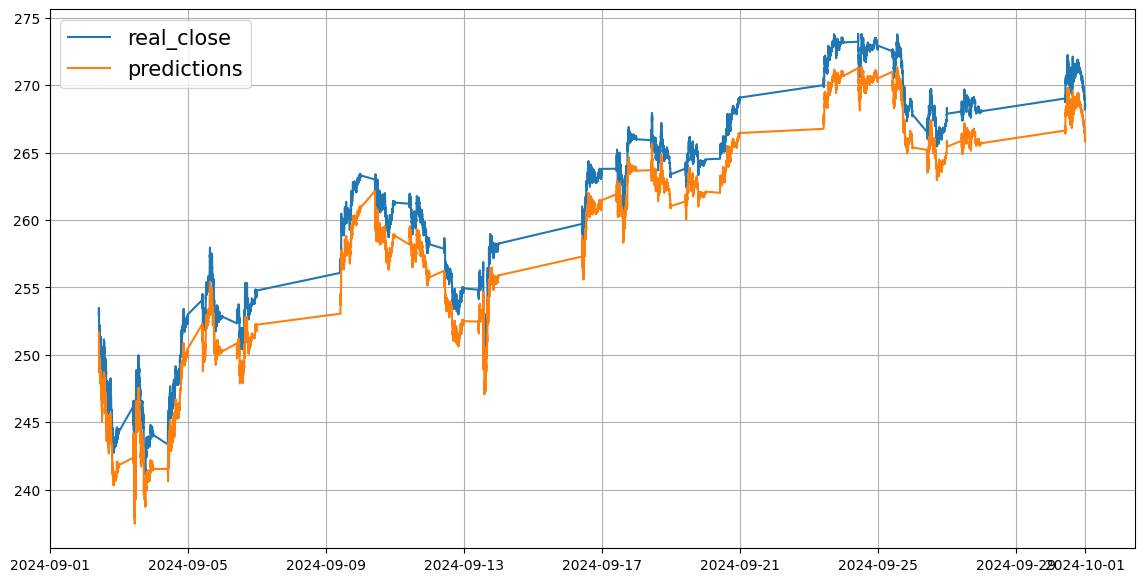

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], sber_df['close'], label='real_close')
    
# Линия для предсказаний
plt.plot(df['date'], df['predictions']-2.3, label='predictions', linestyle='-')

plt.legend(fontsize=15)
plt.grid(True)

# Показать график
plt.show()

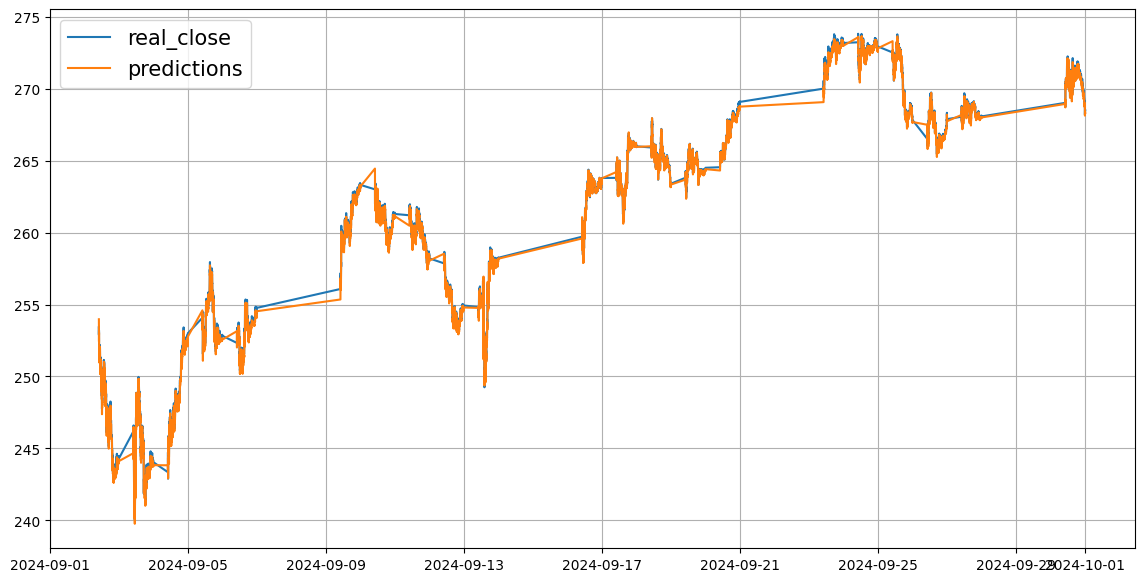

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], sber_df['close'], label='real_close')
    
# Линия для предсказаний
plt.plot(df['date'], df['predictions'], label='predictions', linestyle='-')

plt.legend(fontsize=15)
plt.grid(True)

# Показать график
plt.show()

SBER 2.3

AGRO 0

CHMF 0

MTSS 0.8

SIBN 2.1

SMLT 0 

VKCO 4.2

YDEX 0 

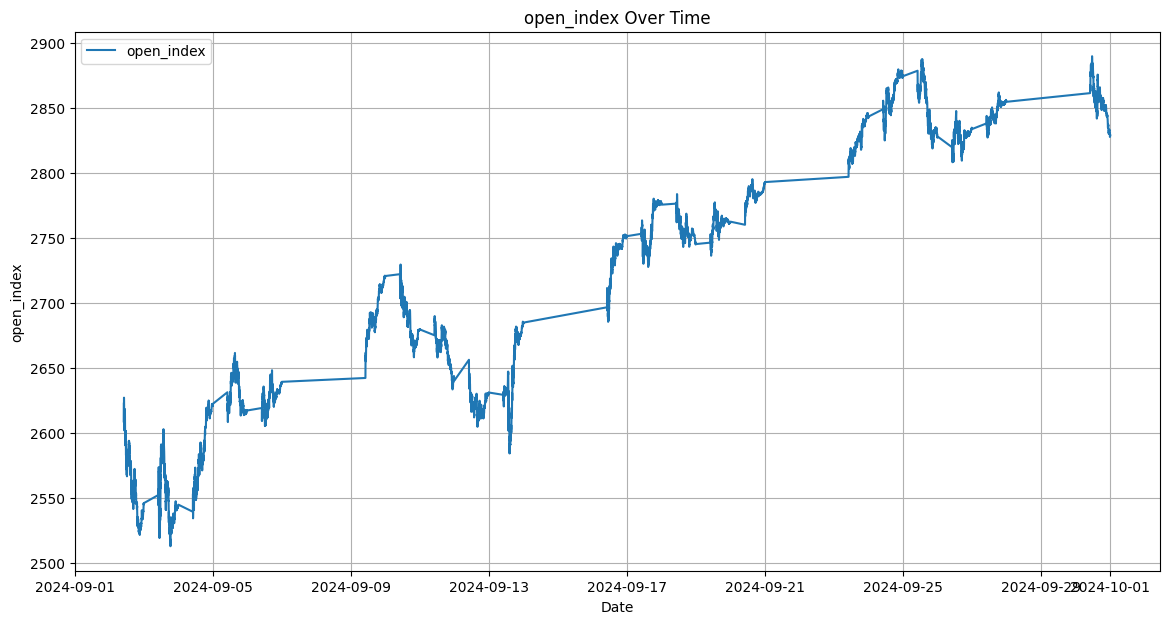

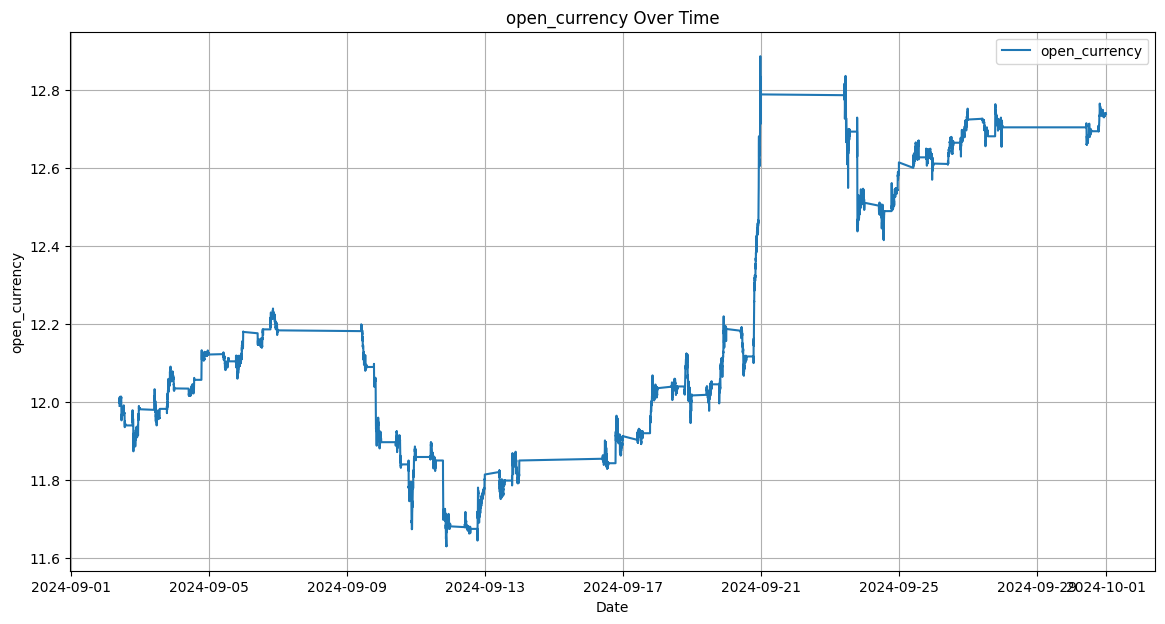

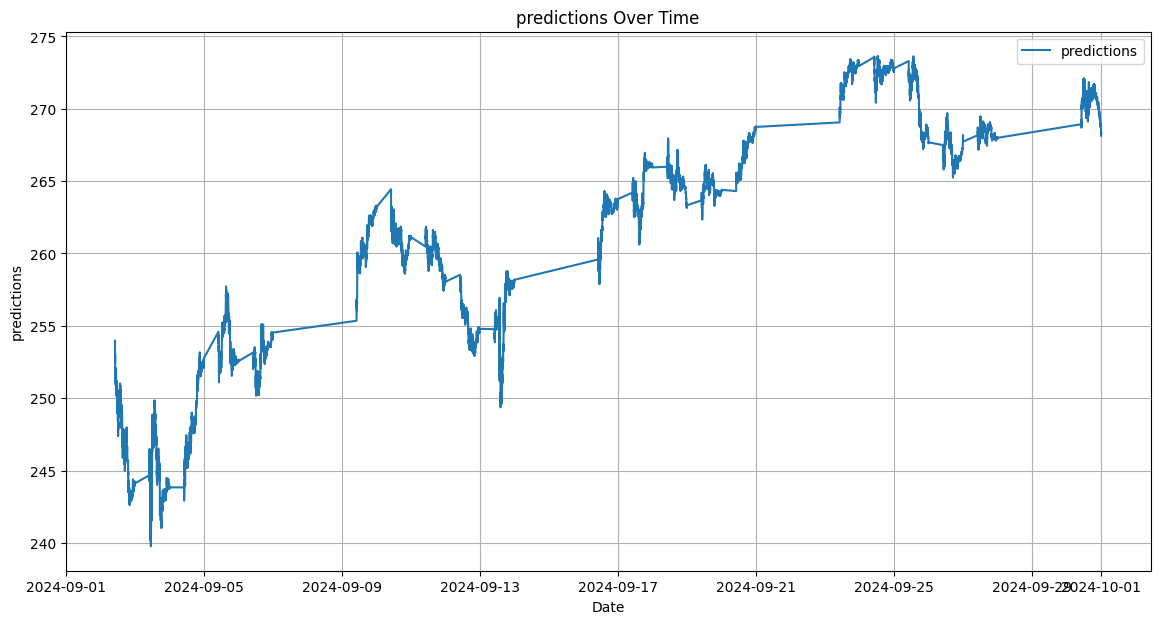

In [11]:
df['date'] = pd.to_datetime(df['date'])
# 'NEWS_COUNT',
# Список признаков для построения графиков
features = ['open_index', 'open_currency', 'predictions']
# features = ['volume', 'predictions']

# Построим графики для каждого признака
for feature in features:
    plt.figure(figsize=(14, 7))
    
    # Линия для признака
    plt.plot(df['date'], df[feature], label=feature)
    
    # Настройки графика
    plt.title(f'{feature} Over Time')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    
    # Показать график
    plt.show()